# Модуль A

*В этом модуле предстоит изучить технологию автоматизированного ультразвукового контроля, загрузить данные контроля, предварительно их изучить, очистить от ненужных данных для последующего анализа с учетом длины сварного соединения.*

 ### 1.1 ЗАГРУЗКА ДАННЫХ

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, silhouette_score

*Так как нам представлены 3 файла с  результатами контроля и три файла с целевой переменнной target, которые мы будем использовать позже.:*

In [2]:
df_1=pd.read_csv('target1.csv')
df_2=pd.read_csv('target2.csv')
df_3=pd.read_csv('target1.csv')
df_4=pd.read_table('SOP1.txt',sep='\D+',skiprows=1, header=None, engine='python')
df_5=pd.read_table('SOP2.txt',sep='\D+',skiprows=1, header=None, engine='python')
df_6=pd.read_table('SOP3.txt',sep='\D+',skiprows=1, header=None, engine='python')

*Данные target соеденю с помощью метода concat, так как столбцы у данных одинаковые.*

In [3]:
data_2=pd.concat([df_1, df_2, df_3], axis=0)

*У данных результата контроля нужно удалить первую строчку, так как это просто заголовок, который не несет ни какую нужную информацию:*

In [4]:
data_1=pd.concat([df_4, df_5, df_6], axis=0)

### 1.2 ПРЕДВАРИТЕЛЬНОЕ ИЗУЧЕНИЕ

*Выведем статистические таблицы данных контроля:*

In [5]:
data_1.describe().T
df_7=data_1.copy()

*Из таблицы видно, что медианное и среднее значение отличается , это говорит о возможных дефектах в выборке.*

*Для того, что-бы дефекты в выборке можно было определить точнее, выведем график- ящик с усами:*

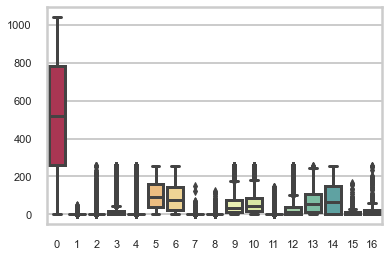

In [6]:
sns.set_context('poster',font_scale=0.5)
sns.boxplot(data=data_1, palette='Spectral');

*Из графиков видно, что больше всего .*

*Теперь можно посмотреть на распределения в совокупности всех результатов контроля:*

In [7]:
data_1.hist(figsize=(20,20),color="wheat",bins=10);

*Признаки распределены хорошо, так как значений больше всего в середине, если не учитывать 0 столбец(так как это расстояние).*

In [8]:
sns.distplot(data_1);

*На полигоне видно, что аплитула сигала постепенно уменьшается, а расстояние наоборот увеличивается.Это говорит о том, что в выборке скорее всего изночально были дефекты, а потом они постепенно уменьшались.*

### 1.3 ОПРЕДЕЛЕНИЕ МЕТОДОВ КОНТРОЛЯ

*Известно, что в идеале амплитуда эхо-сигнала при отсутствии дефекта должна равняться нулю, а амплитуда теневого сигнала – 255 усл.ед., тогда медианное значение эхо сигнала равняется примерно 0, а теневого приблизительно 255, тогда найдем эти методы:*

In [9]:
for col in data_1[:0]:
    if data_1[col].median()< 20:
        print(col,'Эхо-метод')
    else:
        print(col,'Теневой-метод')

0 Теневой-метод
1 Эхо-метод
2 Эхо-метод
3 Эхо-метод
4 Эхо-метод
5 Теневой-метод
6 Теневой-метод
7 Эхо-метод
8 Эхо-метод
9 Теневой-метод
10 Теневой-метод
11 Эхо-метод
12 Эхо-метод
13 Теневой-метод
14 Теневой-метод
15 Эхо-метод
16 Эхо-метод


### 1.4 ОТЧЕТ

*В этом модуле я изучила технологию автоматизированного ультразвукового контроля, загрузила данные контроля, предварительно их изучила, очистила от ненужных данных для последующего анализа с учетом длины сварного соединения.*

# Модуль B

В этом модуле необходимо выявить взаимные корреляции между переменными с учетом сдвига, построить графики выделяющие особенности данных, определить по ним расстояние между раздельносовмещенной схемой и хордовой, а также на основе данного анализа привести данные контроля к одной координатной системе.

### 2.1 ОПРЕДЕЛЕНИЕ РАССТОЯНИЯ МЕЖДУ СХЕМАМИ ПРОЗВУЧИВАНИЯ 

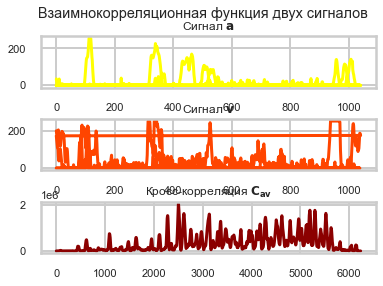

In [10]:
a = data_1[2]
v = data_1[3]

c = np.correlate(a, v, 'full')

fig, axes = plt.subplots(3, 1)

axes[0].plot(a, color = 'yellow')
axes[0].set_title(r'Сигнал $\mathbf{a}$')

axes[1].plot(v, color = 'orangered')
axes[1].set_title(r'Сигнал $\mathbf{v}$')

axes[2].plot(c, color = 'darkred')
axes[2].set_title(r'Кросс-корреляция $\mathbf{C_{av}}$')

fig.suptitle('Взаимнокорреляционная функция двух сигналов')
fig.subplots_adjust(hspace=0.6)

plt.show()

*По взаимной корреляции видно, что зависимость между признаками довольно хорошая, так как признаки явно отличаются, и не имеют схожести.* 

*Теперь необходимо определить тип дефекта.Он делится на поперечный-который расположен перпендикулярно и продольный-который расположен вдоль сварочного шва:*

In [11]:
for x in df_7.columns:
    q75,q25 = np.percentile(df_7.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df_7.loc[df_7[x] < min,x] = np.nan
    df_7.loc[df_7[x] > max,x] = np.nan
    
    missing=df_7[x].isnull()
    df_missing= np.sum(missing)
    if df_missing >0:
        print(x,'-поперечный')
    else:
        print(x,'-продольный')

0 -продольный
1 -поперечный
2 -поперечный
3 -поперечный
4 -поперечный
5 -продольный
6 -продольный
7 -поперечный
8 -поперечный
9 -поперечный
10 -поперечный
11 -поперечный
12 -поперечный
13 -поперечный
14 -продольный
15 -поперечный
16 -поперечный


### 2.2 ОПРЕДЕЛЕНИЕ СХЕМ ПРОЗВУЧИВАНИЯ 

*Всего схемы делятся на  2 категории: хордовая  и раздельно совмещення.Определить категорию схемы можно по расстоянию шва, или трещинам.Наиболее проще это сделать с помощью трещины так как точного расстояния шва для определения не сказанно.Любая трещина это дефект, в хордовой схеме трещина находится сверху, тогда определим схемы при помощи дефекта:*

In [12]:
for x in df_7.columns:
    q75,q25 = np.percentile(df_7.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df_7.loc[df_7[x] < min,x] = np.nan
    df_7.loc[df_7[x] > max,x] = np.nan
    
    missing=df_7[x].isnull()
    df_missing= np.sum(missing)
    if df_missing >0:
        print(x,'-хордовая')
    else:
        print(x,'-раздельно совмещення')

0 -раздельно совмещення
1 -хордовая
2 -хордовая
3 -хордовая
4 -хордовая
5 -раздельно совмещення
6 -раздельно совмещення
7 -хордовая
8 -хордовая
9 -хордовая
10 -хордовая
11 -хордовая
12 -хордовая
13 -хордовая
14 -раздельно совмещення
15 -хордовая
16 -хордовая


*также сожно определить стороны, где расположены преобразователи, при эхо методе, преобразователи распологаются с одно стороны, а при теневом с разных, также, необходимо обращать внимание на тип схемы, их можно определить вручную так как схемы и типы дефектов уже определены:*

*В заключении, можно построить таблицу значений, которые мы определили:*

In [13]:
new_data= pd.DataFrame([[1,'Эхо-метод', 'Хордовая','A','Поперечные'],
                        [2,'Эхо-метод', 'Хордовая','Б','Поперечные'],
                        [3,'Эхо-метод','Хордовая','A','Поперечные'],
                        [4,'Эхо-метод','Хордовая','Б','Поперечные'],
                        [5,'Теневой-метод','Раздельно-совмещенная','А-Б','Поперечные'],
                        [6,'Теневой-метод','Раздельно-совмещенная','Б-А','Поперечные'],
                        [7,'Эхо-метод','Хордовая','А','Поперечные'],
                        [8,'Эхо-метод','Хордовая','Б','Поперечные'],
                        [9,'Теневой-метод','Хордовая','А-Б','Поперечные'],
                        [10,'Теневой-метод','Хордовая','Б-A','Поперечные'],
                        [11,'Эхо-метод','Хордовая','А','Поперечные'],
                        [12,'Эхо-метод','Хордовая','Б','Поперечные'],
                        [13,'Теневой-метод','Хордовая ','А-Б','Поперечные'],
                        [14,'Теневой-метод','Хордовая ','Б-А','Поперечные'],
                        [15,'Эхо-метод','Раздельно-совмещенная ','А','Поперечные'],
                        [16,'Эхо-метод','Хордовая ','Б','Поперечные']],
                       columns=['№ такта','Методы','Схема', 'Сторона','Выявление дефектов'])
new_data

№ такта         Методы                   Схема Сторона Выявление дефектов
0         1      Эхо-метод                Хордовая       A         Поперечные
1         2      Эхо-метод                Хордовая       Б         Поперечные
2         3      Эхо-метод                Хордовая       A         Поперечные
3         4      Эхо-метод                Хордовая       Б         Поперечные
4         5  Теневой-метод   Раздельно-совмещенная     А-Б         Поперечные
5         6  Теневой-метод   Раздельно-совмещенная     Б-А         Поперечные
6         7      Эхо-метод                Хордовая       А         Поперечные
7         8      Эхо-метод                Хордовая       Б         Поперечные
8         9  Теневой-метод                Хордовая     А-Б         Поперечные
9        10  Теневой-метод                Хордовая     Б-A         Поперечные
10       11      Эхо-метод                Хордовая       А         Поперечные
11       12      Эхо-метод                Хордовая       Б         Поперечные
12       13  Теневой-метод               Хордовая      А-Б         Поперечные
13       14  Теневой-метод               Хордовая      Б-А         Поперечные
14       15      Эхо-метод  Раздельно-совмещенная        А         Поперечные
15       16      Эхо-метод               Хордовая        Б         Поперечные

### 2.3 ПРИВЕДЕНИЕ К ОБЩЕЙ КООРДИНАТЕ 

In [14]:
lbl=LabelEncoder()
for col in new_data.columns:
    new_data[col]=lbl.fit_transform(new_data[col])

*Здесь необходимо было привести данные к одному числовому промежутку.Я выбрала метод MinMaxScaler, так как он является наиболее стандартным, и выдоёт значения в промежутке от 0 до 1.*

In [15]:
scaler=MinMaxScaler()
df_scaler=scaler.fit_transform(new_data)

In [34]:
new_data.head()

№ такта  Методы  Схема  Сторона  Выявление дефектов
0        0       1      2        0                   0
1        1       1      2        3                   0
2        2       1      2        0                   0
3        3       1      2        3                   0
4        4       0      0        2                   0

### 2.4 ОТЧЕТ 

*В этом модуле я выявила взаимные корреляции между переменными с учетом сдвига, построила графики выделяющие особенности данных, определила по ним расстояние между раздельносовмещенной схемой и хордовой, а также на основе данного анализа привела данные контроля к одной координатной системе.*

# Модуль C

### 3.1 РАЗБИЕНИЕ ДАННЫХ НА ОБУЧАЮЩУЮ И ТЕСТИРУЮЩУЮ ВЫБОРКИ

Теперь можно приступить к разделению данных на тестирующую и обучающую, для этого, воспользуюсь методом train_test_split, и разделю так, что-бы выборка SAP составляла выборку для теста, а taget мы обучаем.Выборки разделю так, что-бы 30% составляла тестируящая часть, и 70% обучающая, так как для обучения модели необходимо больше данных.

In [17]:
X=new_data.copy()
Y=data_2['Тип дефекта'][:16]
X_train , X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=10)

### 3.2 ВИЗУАЛЬНОЕ ОБОСНОВАНИЕ ВЫБОРА ПЕРЕМЕННЫХ/ РАБОТОСПОСОБНОСТИ МОДЕЛИ 

In [18]:
lbl=LabelEncoder()
for col in data_2.columns:
    data_2[col]=lbl.fit_transform(data_2[col])

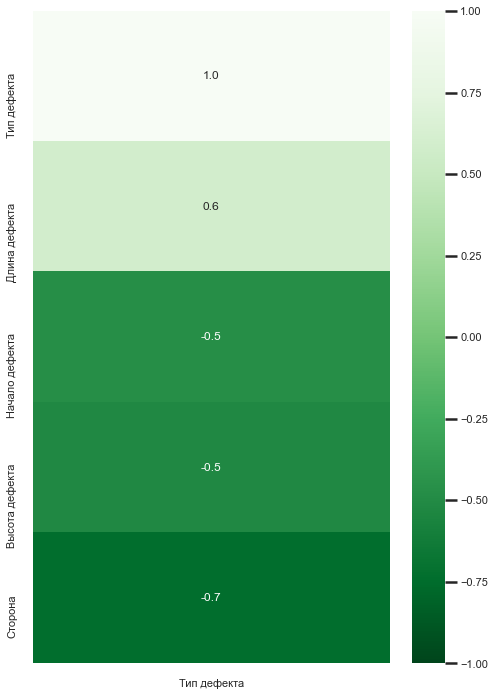

In [19]:
plt.figure(figsize=(8, 12))
heatmap=sns.heatmap(data_2.corr()[['Тип дефекта']].sort_values(by='Тип дефекта', ascending=False), vmin=-1, vmax=1, cmap='Greens_r',
                    fmt='.1f', annot=True);

*На графике видно, что выбранная модель имеет коэффициен коррреляции меньше 0.7, это означает, что зависимость между признаками хорошая, и признаки не имеют схожести.А значит модель будет хорошо обучаться.*

### 3.3 АРГУМЕНТИРОВАННЫЙ ВЫБОР МОДЕЛИ КЛАССИФИКАЦИИ 

**Выбор классификатора**

*Для обучения возьиу алгоритмы XGBoost-так как это оптимизационный алгоритм , и у него повышенная производительность и эффективная оптимизация вычислений, Стахостический градиентный спуск- также оптимизационный алгоритм, и оптимизируемой функции у этого алгоритма считается на каждом шаге как градиент от одного, случайно выбранного элемента, Дерево решений-наиболеее простой и интерпретируемый алгоритм, хорошо работает с большими данными.*

**Обучение**

*Обучение с помощью алгоритма XGBoost:*

In [20]:
xgb=XGBClassifier(random_state=10)

In [21]:
xgb.fit(X_train, Y_train)

[06:07:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
y_pred=xgb.predict(X_test)

In [23]:
xgb.score(X_test, Y_test)

0.8

*Обучение с помощью алгоритма Дерево решений:*

In [24]:
tree=DecisionTreeClassifier(random_state=20)

In [25]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=20)

In [26]:
y_pred=tree.predict(X_test)

In [27]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           L       0.75      0.75      0.75         4
           T       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.38      0.38      0.38         5
weighted avg       0.60      0.60      0.60         5



In [28]:
tree.score(X_test, Y_test)

0.6

*Обучение на алгоритма Стахостический градиентный спуск*

In [29]:
sgd=SGDClassifier()

In [30]:
sgd.fit(X_train, Y_train)

SGDClassifier()

In [31]:
y_pred=sgd.predict(X_test)

In [32]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           L       0.75      0.75      0.75         4
           T       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.38      0.38      0.38         5
weighted avg       0.60      0.60      0.60         5



In [33]:
sgd.score(X_test, Y_test)

0.6

*По итогу обучения, лучшую точность показал алгоритм XGBoost, дав 80% правильных предсказаний.*

### 3.4 Отчет

*В этом модуле я произвела разделение данных на обучающую и тестирующую выборки, выбрала признак для обучения классификатора, обоснавала выбор самого классификатора, обучила выбранные алгоритмы на данных.*